In [ ]:
from huggingface_hub import login
login("hf_hHHzbcUbFSCaGMnQntfHvLnyzwWfPtQNA")

In [ ]:
from huggingface_hub import hf_hub_download
path = hf_hub_download(
    repo_id = "rupesh002/Fire_detection_dataset",
    repo_type = "dataset",
    filename = "Fire_dataset_YOLOV8.zip"
)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fire_dataset_YOLOV8.zip:   0%|          | 0.00/190M [00:00<?, ?B/s]

In [ ]:
!unzip -q {path} -d /content/Firee_detection_dataset

In [ ]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 33.4 MB/s eta 0:00:00


In [ ]:
!ls "/content/Firee_detection_dataset/Fire dataset YOLOV8/valid/labels" | head
!ls "//content/Firee_detection_dataset/Fire dataset YOLOV8/train/images" | head

image100_jpg.rf.5c87a00678c60cb204d380fb7780eb27.txt
image101_jpg.rf.c9f1bc050db2516b12e3d4e15df2041a.txt
image103_jpg.rf.ba921b003db1ad895e07cd8f09cfd3ed.txt
image104_jpg.rf.90ea1f68463781a47cd9c343e03a8de0.txt
image105_jpg.rf.63d9a6af716551ef4df304bd4eed1578.txt
image106_jpg.rf.61021e9b2e906fc64a532e8882dd895f.txt
image107_jpg.rf.ffe5a7d10caf50b7f6b5d48413f2aeb3.txt
image108_jpg.rf.29150d4b77687e9baa851faa16700ab9.txt
image109_jpg.rf.662335cc010fa7e15e929fcfb9396100.txt
image110_jpg.rf.1df43098257d07d4f8aa4416fa755024.txt
10-5114140_013119-wabc-elmwood-park-fire-new-closer-img_jpg.rf.8d47235b63f5e85f74f9974514e8c4bb.jpg
10-image_jpg.rf.6a3d0e9df5ead6b5e444261ed0438d23.jpg
11-_106638522_capt324ure_jpg.rf.0b18ef4425856eff91a9674e4119b444.jpg
11-121124-Bangladesh_fire-AP26053436630_jpg.rf.f672294266240a813963cae99b057e68.jpg
12-factory_fire_jpg.rf.c54d1d6e96d623b6dec84ad372179917.jpg
12-recycling-plant-fire_AC30218x_jpg.rf.10f59651861e1371b380bf1d155730ab.jpg
13-791118-naraina-factory_j

In [ ]:
!yolo detect train \
  data="/content/Firee_detection_dataset/Fire dataset YOLOV8/data.yaml" \
  model=yolov8s.pt \
  epochs=120 \
  imgsz=650 \
  batch=16 \
  cache=True \
  amp=True \
  hsv_h=0.02 hsv_s=0.7 hsv_v=0.4 \
  degrees=10 translate=0.1 scale=0.8 fliplr=0.5 mosaic=0.8 \
  patience=20 \
  name=Fire_detector_fast


Ultralytics 8.3.226 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Firee_detection_dataset/Fire dataset YOLOV8/data.yaml, degrees=10, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=120, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.02, hsv_s=0.7, hsv_v=0.4, imgsz=650, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=0.8, multi_scale=False, name=Fire_detector_fast2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, pat

In [ ]:
from ultralytics import YOLO

model = YOLO("/content/best (1).pt")

# Test on a sample image or video
model.predict("/content/Dog chews on lithium-ion battery sparking house fire.mp4", save=True, conf=0.4)



WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/584) /content/Dog chews on lithium-ion battery sparking house fire.mp4: 672x384 (no detections), 58.0ms
video 1/1 (frame 2/584) /content/Dog chews on lithium-ion battery sparking house fire.mp4: 672x384 (no detections), 12.2ms
video 1/1 (frame 3/584) /content/Dog chews on lithium-ion battery sparking house fire.mp4: 672x384 (no detections), 12.2ms
video 1/1 (frame 4/584) /content/Dog chews on lithium-ion battery sparking house fire.m

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: '0', 1: 'fire'}
 obb: None
 orig_img: array([[[ 38,  41,  41],
         [ 38,  41,  41],
         [ 38,  41,  41],
         ...,
         [ 38,  38,  36],
         [ 38,  38,  36],
         [ 38,  38,  36]],
 
        [[ 38,  41,  41],
         [ 38,  41,  41],
         [ 38,  41,  41],
         ...,
         [ 38,  38,  36],
         [ 38,  38,  36],
         [ 38,  38,  36]],
 
        [[ 38,  41,  41],
         [ 38,  41,  41],
         [ 38,  41,  41],
         ...,
         [ 38,  38,  36],
         [ 38,  38,  36],
         [ 38,  38,  36]],
 
        ...,
 
        [[ 70,  65,  71],
         [ 70,  65,  71],
         [ 70,  65,  71],
         ...,
         [154, 153, 142],
         [149, 148, 137],
         [146, 145, 134]],
 
        [[ 70,  65,  71],
         [ 70,  65,  71],
         [ 70,  65,  71],
         ...,
         [15

In [ ]:
!yolo detect train \
  data="/content/Firee_detection_dataset/Fire dataset YOLOV8/data.yaml" \
  model="/content/best (1).pt" \
  epochs=50 \
  imgsz=1050 \
  batch=16 \
  lr0=0.001 \
  cache=True \
  amp=True \
  freeze=10 \
  hsv_h=0.02 hsv_s=0.7 hsv_v=0.4 \
  degrees=10 translate=0.1 scale=0.8 fliplr=0.5 mosaic=0.8 \
  patience=50 \
  name=Fire_detector_finetuned_final


Ultralytics 8.3.227 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Firee_detection_dataset/Fire dataset YOLOV8/data.yaml, degrees=10, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=10, half=False, hsv_h=0.02, hsv_s=0.7, hsv_v=0.4, imgsz=1050, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/best (1).pt, momentum=0.937, mosaic=0.8, multi_scale=False, name=Fire_detector_finetuned_final2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, ov

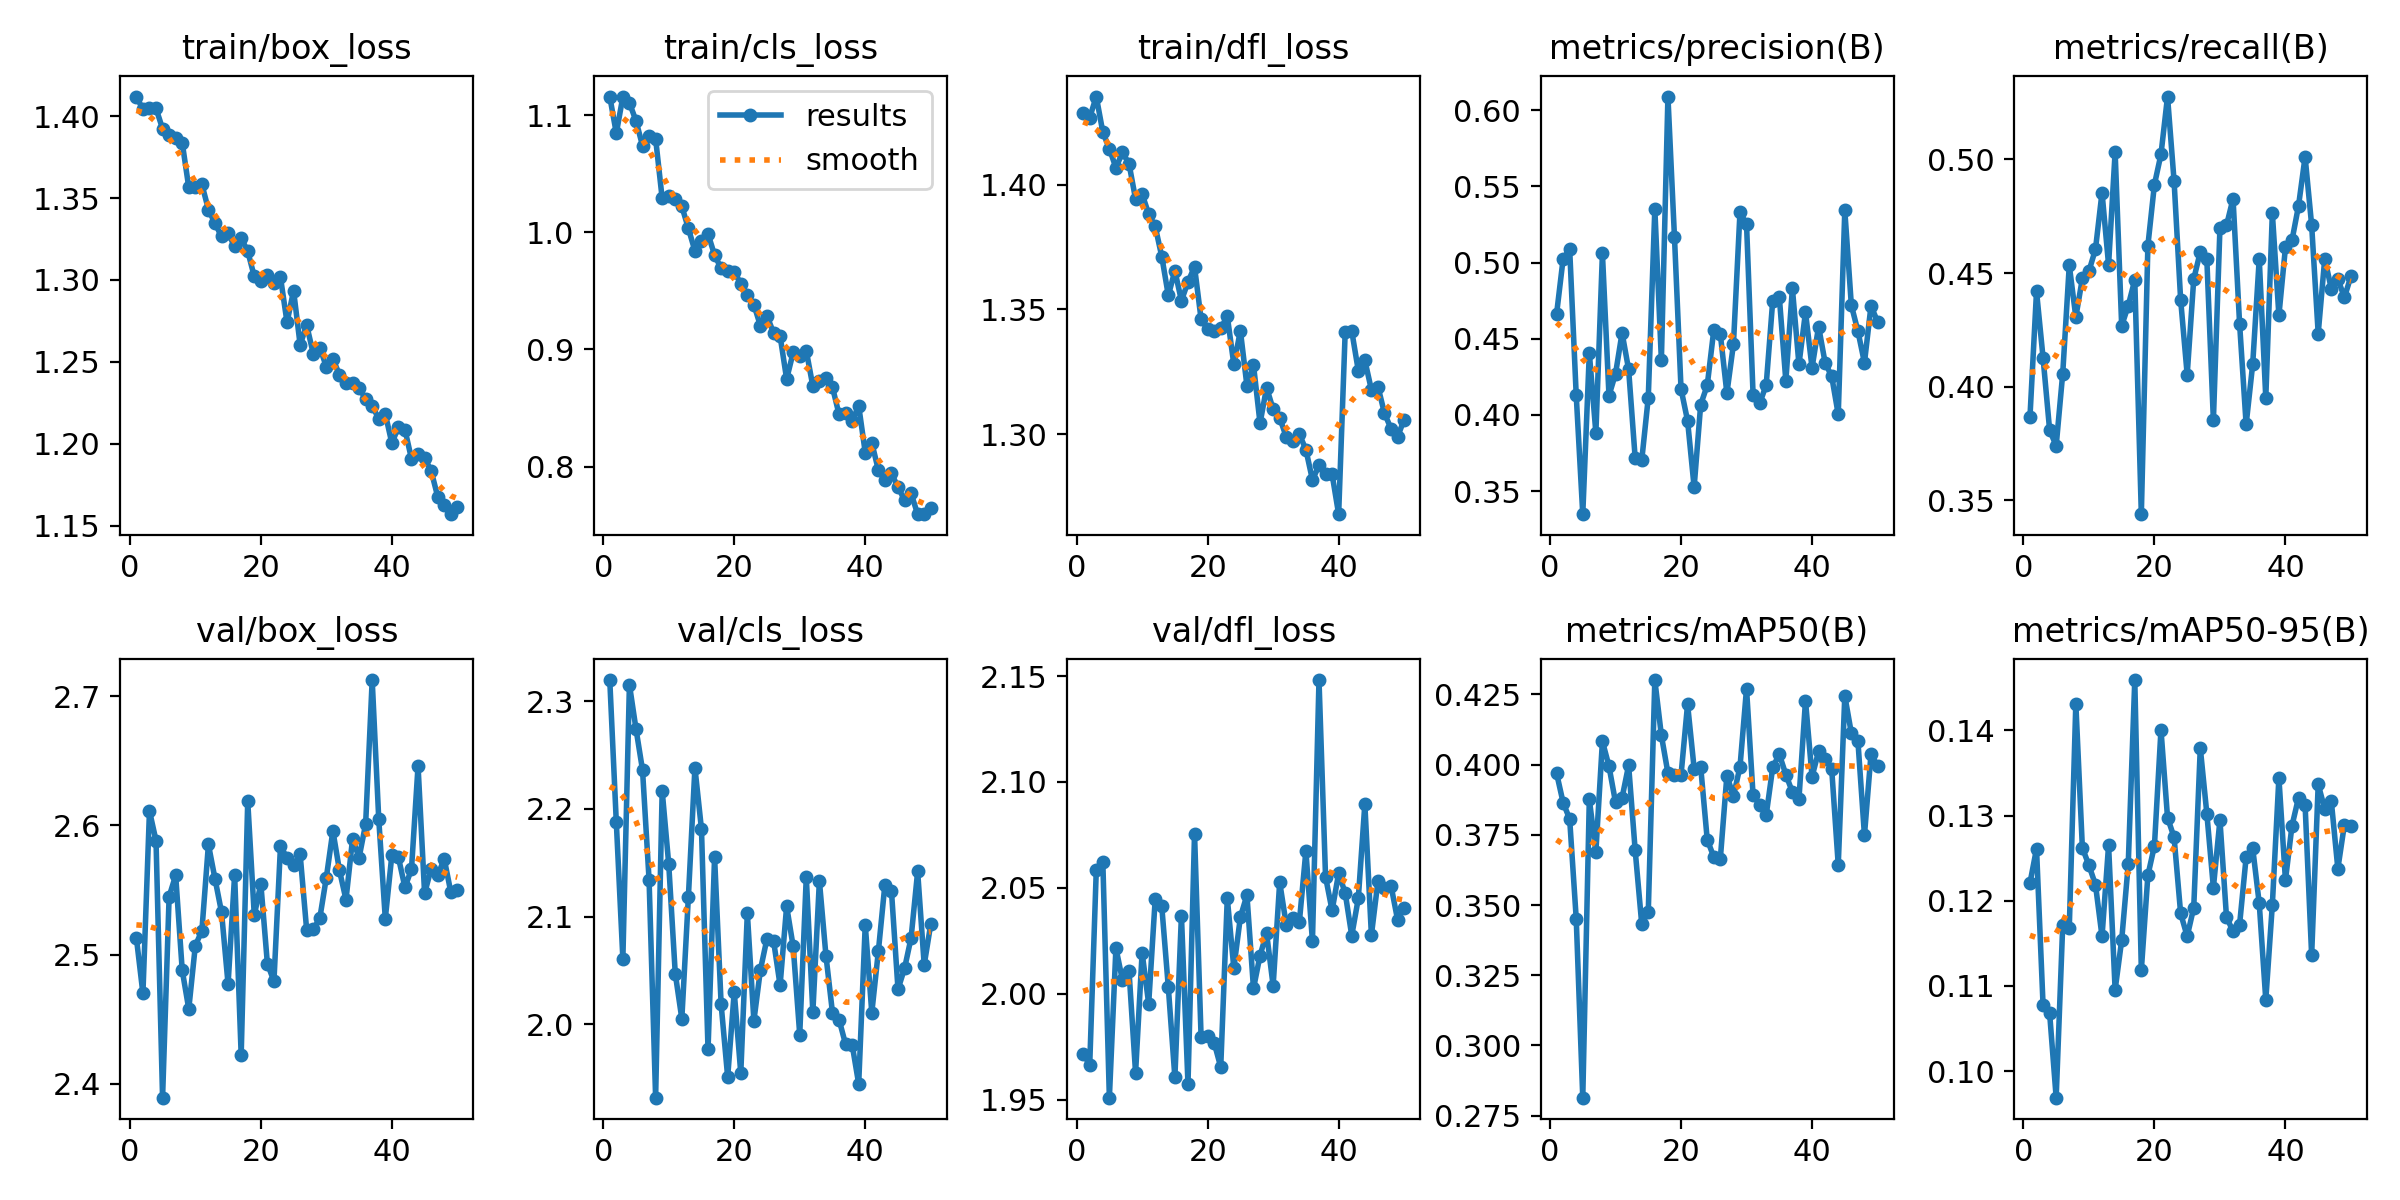

In [ ]:
img = "/content/runs/detect/Fire_detector_finetuned_final2/results.png"
from PIL import Image
from IPython.display import display

imag = Image.open(img)
display(imag)


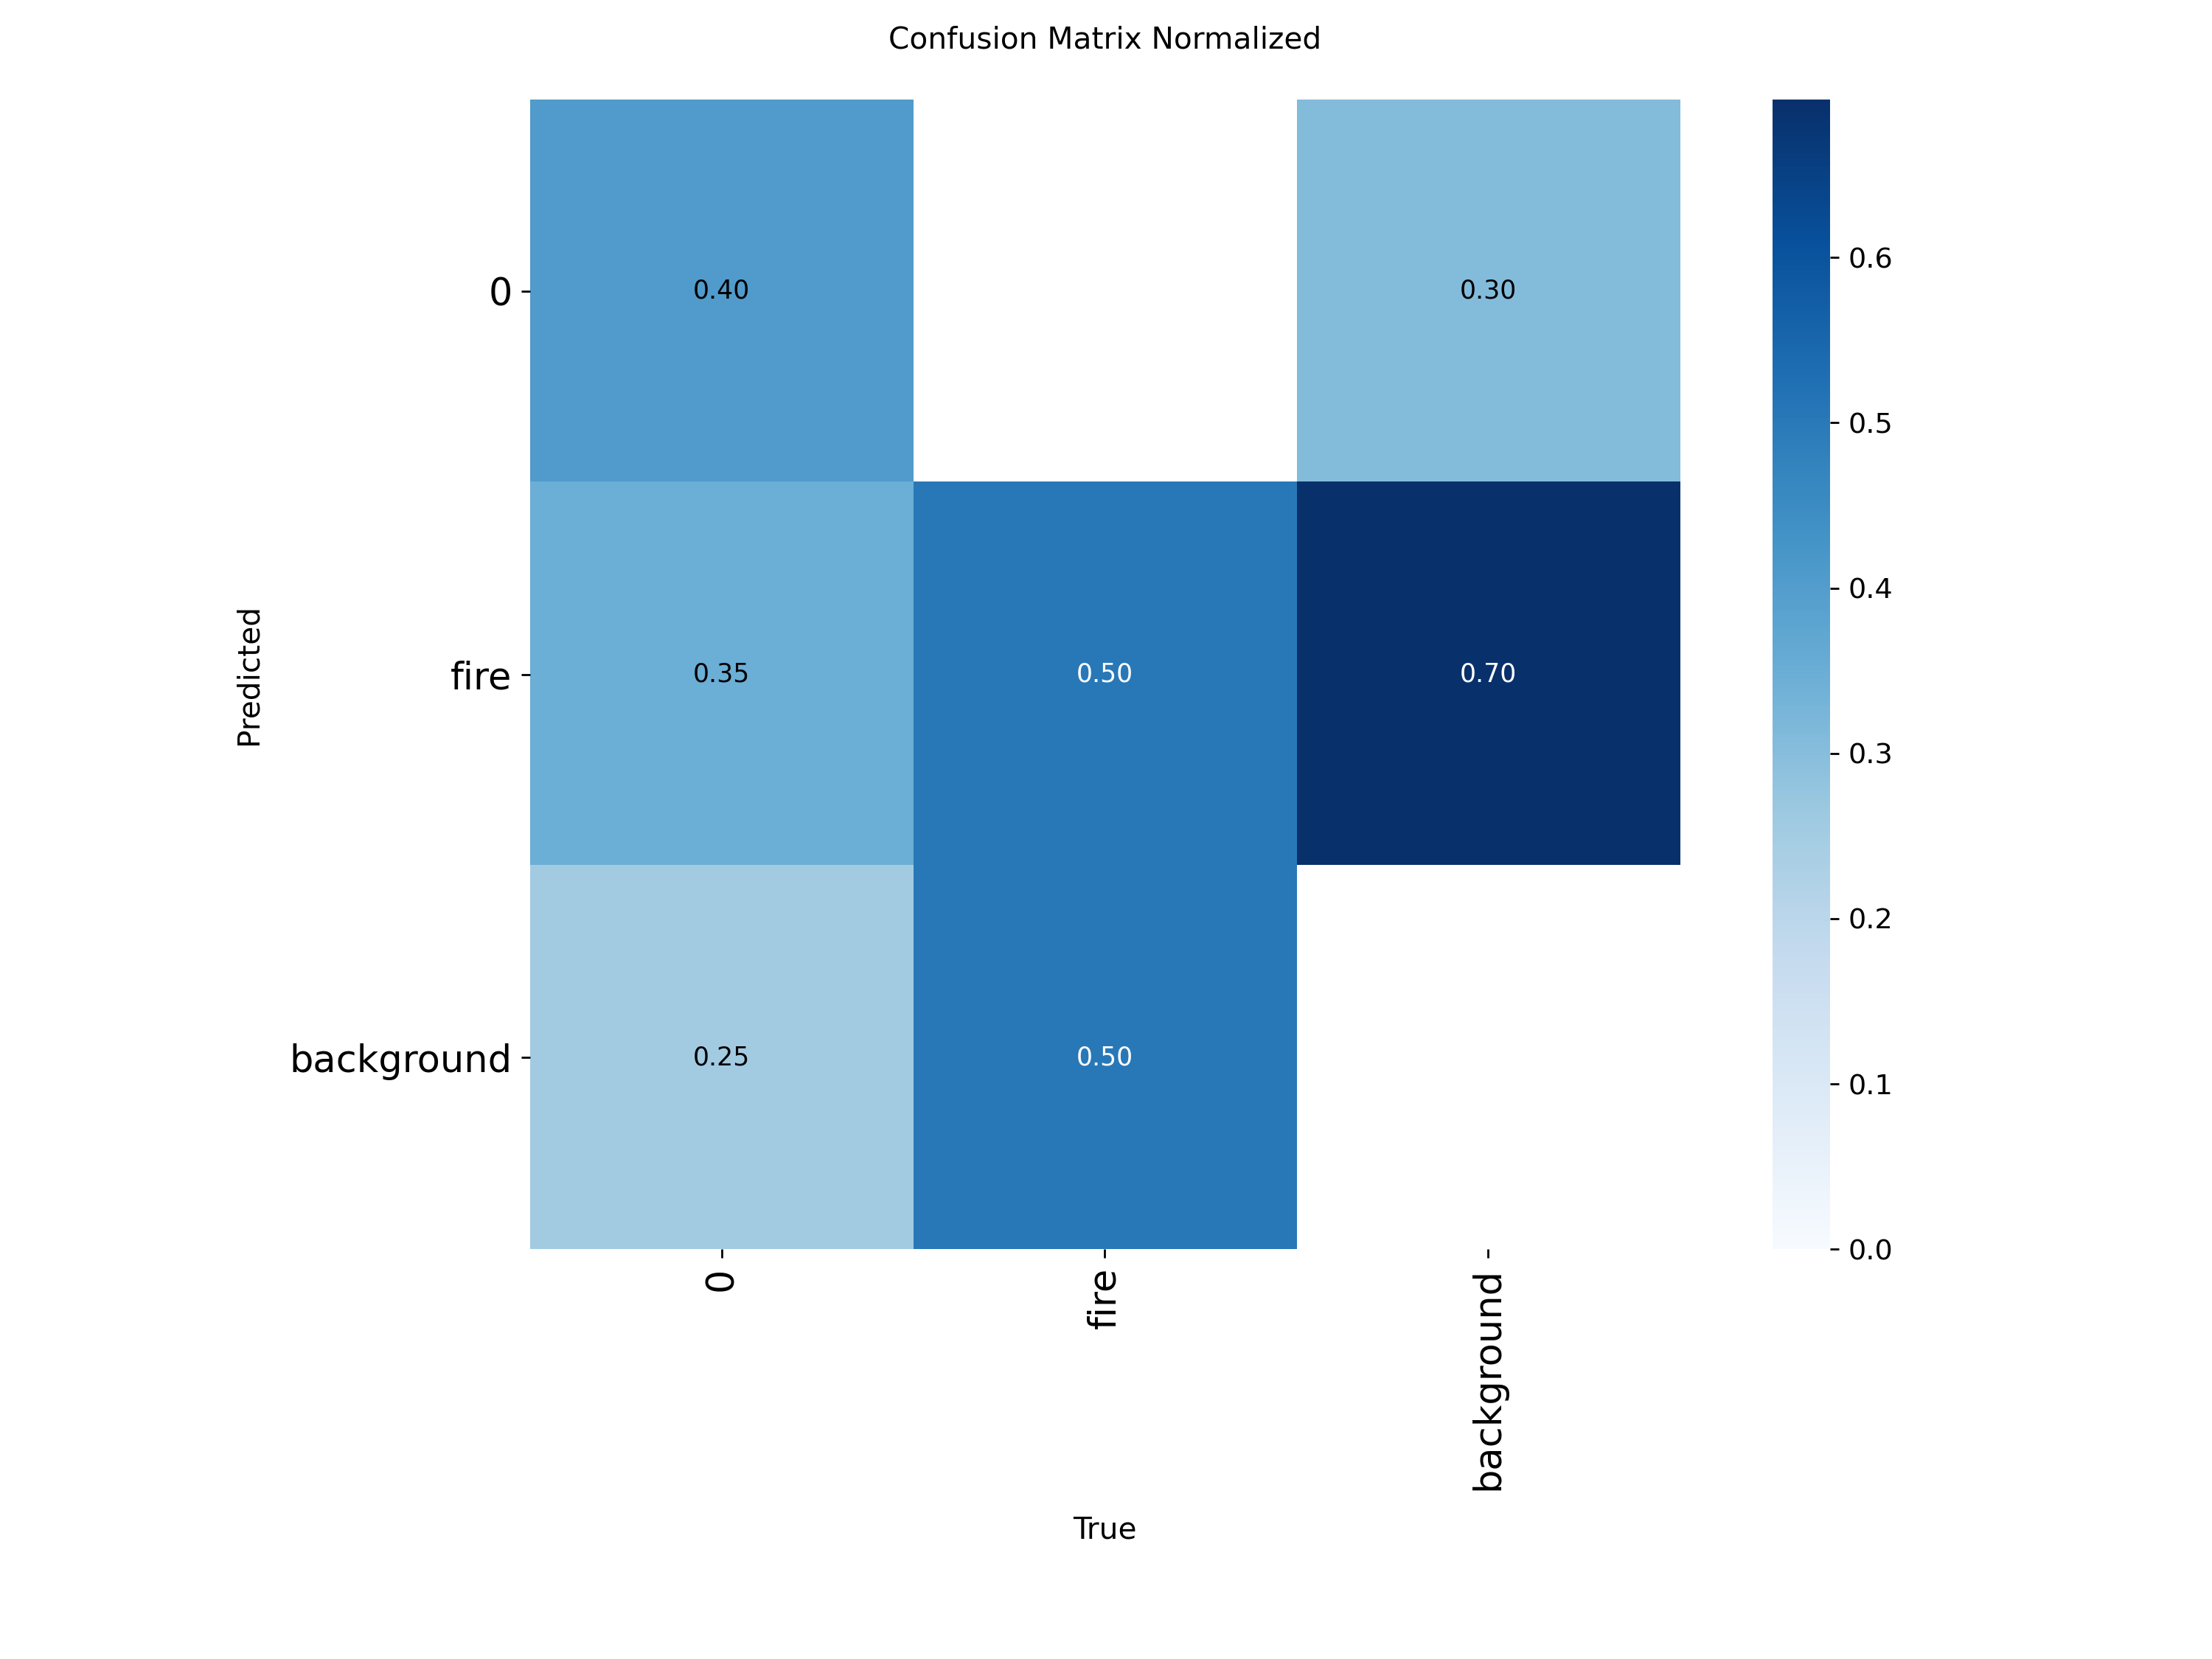

In [ ]:
imag = Image.open("/content/runs/detect/Fire_detector_finetuned_final2/confusion_matrix_normalized.png")
display(imag)

In [ ]:
from ultralytics import YOLO

# Load the trained model
model = YOLO("/content/runs/detect/Fire_detector_finetuned_final2/weights/best.pt")

# Run prediction on the video
results = model.predict(
    source="/content/videoplayback (1).mp4",
    save=True,  # saves annotated video to disk
    conf=0.25,  # confidence threshold (adjust as needed)
    show=True   # show results in notebook (optional)
)


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/1801) /content/videoplayback (1).mp4: 608x1056 4 fires, 23.4ms
video 1/1 (frame 2/1801) /content/videoplayback (1).mp4: 608x1056 3 fires, 22.8ms
video 1/1 (frame 3/1801) /content/videoplayback (1).mp4: 608x1056 3 fires, 22.8ms
video 1/1 (frame 4/1801) /content/videoplayback (1).mp4: 608x1056 4 fires, 22.8ms
video 1/1 (frame 5/1801) /content/videoplayback (1).mp4: 608x1056 2 fires, 22.8ms
video 1/1 (frame 6/1801) /content/videoplaybac